<a href="https://colab.research.google.com/github/cesaroliveiragoes/Challenge-FIAP-NEXT-2023-Minsait-Rural-Cup/blob/main/challenge_fiap_next_2023_sprint_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATASET 1: ENDEREÇOS ATIBAIA

Importar Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

Carregar os Dados

In [ ]:
#tratamento dos dados da tabela

dados_atibaia = pd.read_csv('3504107_ATIBAIA.csv', sep = ';', decimal = ',', encoding = 'latin1')

In [ ]:
dados_atibaia

,COD_UF,COD_MUNICIPIO,COD_DISTRITO,COD_SUBDISTRITO,SITUACAO,NOM_TIPO_SEGLOGR,NOM_TITULO_SEGLOGR,NOM_SEGLOGR,NUM_ENDERECO,DSC_MODIFICADOR,...,NOM_COMP_ELEM4,VAL_COMP_ELEM4,NOM_COMP_ELEM5,VAL_COMP_ELEM5,LATITUDE,LONGITUDE,ALTITUDE,DSC_LOCALIDADE,COD_ESPECIE,CEP
0,35,4107,5,0,2,AVENIDA,NaN,JERONIMO CAMARGO,NaN,SN,...,NaN,NaN,NaN,NaN,-23.109026638888892,-46.52119,740.0,RESSACA,3,12940060.0
1,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,...,NaN,NaN,NaN,NaN,-23.071881666666666,-46.679563333333334,753.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
2,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,2193.0,NaN,...,NaN,NaN,NaN,NaN,-23.081089972222223,-46.65175,726.0,BAIRRO DA USINA,3,12940970.0
3,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,...,NaN,NaN,NaN,NaN,-23.085945,-46.66995997222222,758.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
4,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,...,NaN,NaN,NaN,NaN,-23.086161666666666,-46.66964330555555,757.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,...,NaN,NaN,NaN,NaN,-23.16467997222222,-46.61871163888889,796.0,MARACANA,3,12940060.0
597,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,...,NaN,NaN,NaN,NaN,-23.16493,-46.62441166666667,NaN,MARACANA,3,12940060.0
598,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,...,NaN,NaN,NaN,NaN,-23.17205163888889,-46.61913,795.0,MARACANA,3,12940060.0
599,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,...,NaN,NaN,NaN,NaN,-23.16443163888889,-46.62228997222222,767.0,MARACANA,3,12940060.0


Tratar os dados para análises

In [ ]:
# eliminar as colunas vazias

dados_atibaia = dados_atibaia.dropna(axis=1, how='all')

In [ ]:
dados_atibaia

,COD_UF,COD_MUNICIPIO,COD_DISTRITO,COD_SUBDISTRITO,SITUACAO,NOM_TIPO_SEGLOGR,NOM_TITULO_SEGLOGR,NOM_SEGLOGR,NUM_ENDERECO,DSC_MODIFICADOR,NOM_COMP_ELEM1,VAL_COMP_ELEM1,LATITUDE,LONGITUDE,ALTITUDE,DSC_LOCALIDADE,COD_ESPECIE,CEP
0,35,4107,5,0,2,AVENIDA,NaN,JERONIMO CAMARGO,NaN,SN,NaN,NaN,-23.109026638888892,-46.52119,740.0,RESSACA,3,12940060.0
1,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.071881666666666,-46.679563333333334,753.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
2,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,2193.0,NaN,NaN,NaN,-23.081089972222223,-46.65175,726.0,BAIRRO DA USINA,3,12940970.0
3,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.085945,-46.66995997222222,758.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
4,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.086161666666666,-46.66964330555555,757.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,NaN,NaN,-23.16467997222222,-46.61871163888889,796.0,MARACANA,3,12940060.0
597,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,NaN,NaN,-23.16493,-46.62441166666667,NaN,MARACANA,3,12940060.0
598,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,NaN,NaN,-23.17205163888889,-46.61913,795.0,MARACANA,3,12940060.0
599,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,NaN,NaN,-23.16443163888889,-46.62228997222222,767.0,MARACANA,3,12940060.0


In [ ]:
# Alterar o nome das colunas para facilitar a análise

dados_atibaia = dados_atibaia.rename(columns = {'NOM_TIPO_SEGLOGR':'NOME_TIPO', 'NOM_TITULO_SEGLOGR':'NOME_TITULO', 'NOM_SEGLOGR': 'NOME_LOGRADOURO', 'NOM_COMP_ELEM1':'NOME_COMPLEMENTO','DSC_LOCALIDADE' : 'NOME_BAIRRO'})

In [ ]:
dados_atibaia

,COD_UF,COD_MUNICIPIO,COD_DISTRITO,COD_SUBDISTRITO,SITUACAO,NOME_TIPO,NOME_TITULO,NOME_LOGRADOURO,NUM_ENDERECO,DSC_MODIFICADOR,NOME_COMPLEMENTO,VAL_COMP_ELEM1,LATITUDE,LONGITUDE,ALTITUDE,NOME_BAIRRO,COD_ESPECIE,CEP
0,35,4107,5,0,2,AVENIDA,NaN,JERONIMO CAMARGO,NaN,SN,NaN,NaN,-23.109026638888892,-46.52119,740.0,RESSACA,3,12940060.0
1,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.071881666666666,-46.679563333333334,753.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
2,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,2193.0,NaN,NaN,NaN,-23.081089972222223,-46.65175,726.0,BAIRRO DA USINA,3,12940970.0
3,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.085945,-46.66995997222222,758.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
4,35,4107,5,0,2,ESTRADA,NaN,BENTO SOARES,NaN,SN,NaN,NaN,-23.086161666666666,-46.66964330555555,757.0,BAIRRO CAMPO DOS ALEIXOS,3,12940970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,NaN,NaN,-23.16467997222222,-46.61871163888889,796.0,MARACANA,3,12940060.0
597,35,4107,5,0,2,AVENIDA,NaN,COPACABANA,NaN,SN,NaN,NaN,-23.16493,-46.62441166666667,NaN,MARACANA,3,12940060.0
598,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,NaN,NaN,-23.17205163888889,-46.61913,795.0,MARACANA,3,12940060.0
599,35,4107,5,0,2,RUA,VEREADOR,CINTRA SOBRINHO,NaN,SN,NaN,NaN,-23.16443163888889,-46.62228997222222,767.0,MARACANA,3,12940060.0


In [ ]:
# selecionar as colunas com as informações relevantes para nossas análises

dados_atibaia_final = dados_atibaia[['COD_UF', 'COD_MUNICIPIO', 'NOME_TIPO', 'NOME_LOGRADOURO','NUM_ENDERECO', 'NOME_COMPLEMENTO', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'NOME_BAIRRO', 'CEP']]

In [ ]:
dados_atibaia_final

,COD_UF,COD_MUNICIPIO,NOME_TIPO,NOME_LOGRADOURO,NUM_ENDERECO,NOME_COMPLEMENTO,LATITUDE,LONGITUDE,ALTITUDE,NOME_BAIRRO,CEP
0,35,4107,AVENIDA,JERONIMO CAMARGO,NaN,NaN,-23.109026638888892,-46.52119,740.0,RESSACA,12940060.0
1,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.071881666666666,-46.679563333333334,753.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
2,35,4107,ESTRADA,BENTO SOARES,2193.0,NaN,-23.081089972222223,-46.65175,726.0,BAIRRO DA USINA,12940970.0
3,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.085945,-46.66995997222222,758.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
4,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.086161666666666,-46.66964330555555,757.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
...,...,...,...,...,...,...,...,...,...,...,...
596,35,4107,AVENIDA,COPACABANA,NaN,NaN,-23.16467997222222,-46.61871163888889,796.0,MARACANA,12940060.0
597,35,4107,AVENIDA,COPACABANA,NaN,NaN,-23.16493,-46.62441166666667,NaN,MARACANA,12940060.0
598,35,4107,RUA,CINTRA SOBRINHO,NaN,NaN,-23.17205163888889,-46.61913,795.0,MARACANA,12940060.0
599,35,4107,RUA,CINTRA SOBRINHO,NaN,NaN,-23.16443163888889,-46.62228997222222,767.0,MARACANA,12940060.0


In [ ]:
# uma das análises válidas é descobrir a MODA do CEP e NOME_BAIRRO, NOME_LOGRADOURO e NOME_TIPO, desta forma, descobriremos quais os Bairros, CEP, Logradouro e Tipo que mais se repetem
# para os produtores registrados


moda_cep = dados_atibaia_final['CEP'].mode()[0]
moda_bairro = dados_atibaia_final['NOME_BAIRRO'].mode()[0]
moda_logradouro = dados_atibaia_final['NOME_LOGRADOURO'].mode()[0]
moda_tipo = dados_atibaia_final['NOME_TIPO'].mode()[0]

In [ ]:
moda_cep

12940060.0

In [ ]:
moda_bairro

'BAIRRO DO TANQUE'

In [ ]:
moda_logradouro

'NOVA UNIAO'

In [ ]:
moda_tipo

'ESTRADA'

In [ ]:
# Outra análise útil é encontrar mínimo, máximo e média da altitude das propriedades dos produtores cadastrados, pois, são informações úteis para determinar o que será cultivado em determinado local
# uma vez que determinados tipos de produtos não crescem em qualquer altitude

dados_atibaia_final_altitude = dados_atibaia_final.loc[dados_atibaia_final['ALTITUDE'] != 'NaN']

In [ ]:
dados_atibaia_final_altitude

,COD_UF,COD_MUNICIPIO,NOME_TIPO,NOME_LOGRADOURO,NUM_ENDERECO,NOME_COMPLEMENTO,LATITUDE,LONGITUDE,ALTITUDE,NOME_BAIRRO,CEP
0,35,4107,AVENIDA,JERONIMO CAMARGO,NaN,NaN,-23.109026638888892,-46.52119,740.0,RESSACA,12940060.0
1,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.071881666666666,-46.679563333333334,753.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
2,35,4107,ESTRADA,BENTO SOARES,2193.0,NaN,-23.081089972222223,-46.65175,726.0,BAIRRO DA USINA,12940970.0
3,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.085945,-46.66995997222222,758.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
4,35,4107,ESTRADA,BENTO SOARES,NaN,NaN,-23.086161666666666,-46.66964330555555,757.0,BAIRRO CAMPO DOS ALEIXOS,12940970.0
...,...,...,...,...,...,...,...,...,...,...,...
596,35,4107,AVENIDA,COPACABANA,NaN,NaN,-23.16467997222222,-46.61871163888889,796.0,MARACANA,12940060.0
597,35,4107,AVENIDA,COPACABANA,NaN,NaN,-23.16493,-46.62441166666667,NaN,MARACANA,12940060.0
598,35,4107,RUA,CINTRA SOBRINHO,NaN,NaN,-23.17205163888889,-46.61913,795.0,MARACANA,12940060.0
599,35,4107,RUA,CINTRA SOBRINHO,NaN,NaN,-23.16443163888889,-46.62228997222222,767.0,MARACANA,12940060.0


In [ ]:
dados_atibaia_final_altitude['ALTITUDE'] = dados_atibaia_final_altitude['ALTITUDE'].astype(float)

In [ ]:
dados_atibaia_final_altitude.groupby('COD_MUNICIPIO') \
              .agg(altitude_max = pd.NamedAgg('ALTITUDE','max'),
                   altitude_min = pd.NamedAgg('ALTITUDE','min'),
                   altitude_media = pd.NamedAgg('ALTITUDE','mean')) \
              .reset_index()

,COD_MUNICIPIO,altitude_max,altitude_min,altitude_media
0,4107,984.0,708.0,785.035473


In [ ]:
from google.colab import files
dados_agrotoxico_final.to_csv('dados_atibaia_final.csv')
files.download('dados_atibaia_final.csv')

In [ ]:
# RESUMO DATAFRAME 1
# Em resumo este dataframe é uma tabela de endereços, onde, podemos tirar insights referentes a localização dos produtores e suas propriedades para assim, as agências de crédito rural poderem
# conhecer melhor a estrutura dos solicitantes do crédito.

#DATAFRAMES 2 - PRONAMP E PRONAF

In [ ]:
# PRONAF é o Programa Nacional de Fortalecimento da Agricultura Familiar com ojetivo de fortalecer os pequenos produtores rurais do Brasil
# PRONAMP é p Programa Nacional de Apoio ao Médio Produtor Rural

In [ ]:
#Leitura e tratamento das tabelas, separadas por programa para cobrir cada um mais minuciosamente

dados_bcb_pronaf = pd.read_csv('PRONAF.csv', sep = ';', decimal = ',', thousands='.', encoding = 'utf-8-sig')
dados_bcb_pronamp = pd.read_csv('Pronamp.csv', sep = ';', decimal = ',', thousands='.', encoding = 'utf-8-sig')

In [ ]:
dados_bcb_pronamp.head()

,uf,adesao_area Amparada_ha,adesao_qtdContratos,adesao_vlrAmparado,adesao_vlrAdicional,comm_perda_areaAmparada_ha,comm_perda_qtdContratos,comm_perda_vlrAmparado,cobert_def_areaAmparada_ha,cobert_def_qtdContratos,cobert_def_vlrAmparado,cobert_def_vlrDeferido,cobert_anal_areaAmparada_ha,cobert_anal_qtdContratos,cobert_anal_vlrAmparado
0,RS,1500308.9,38429,5.089302e+09,3.084699e+08,591479.2,16001,2.304279e+09,558494.0,15124,2.180849e+09,1.509127e+09,1154.8,36,5.315168e+06
1,PR,1205520.0,31741,4.033450e+09,2.775842e+08,496985.9,12193,1.566591e+09,389503.3,9692,1.233586e+09,7.669351e+08,28737.5,755,1.344468e+08
2,SC,109407.0,5844,6.133910e+08,3.739489e+07,29850.7,1694,1.879823e+08,24263.0,1421,1.605292e+08,8.508840e+07,211.9,13,2.012435e+06
3,MS,102501.4,1918,3.287468e+08,1.855344e+07,28146.3,473,8.486326e+07,23243.2,387,6.980816e+07,4.550500e+07,1496.6,30,6.194775e+06
4,MT,16047.8,244,4.459899e+07,2.549545e+06,820.9,12,2.946369e+06,676.9,10,2.667369e+06,1.888636e+06,0.0,0,0.000000e+00


In [ ]:
dados_bcb_pronamp.rename(columns={'uf': 'UF', 'adesao_area Amparada_ha': 'adesao_areaAmparada_ha'}, inplace=True)

In [ ]:
dados_bcb_pronamp.head()

,UF,adesao_areaAmparada_ha,adesao_qtdContratos,adesao_vlrAmparado,adesao_vlrAdicional,comm_perda_areaAmparada_ha,comm_perda_qtdContratos,comm_perda_vlrAmparado,cobert_def_areaAmparada_ha,cobert_def_qtdContratos,cobert_def_vlrAmparado,cobert_def_vlrDeferido,cobert_anal_areaAmparada_ha,cobert_anal_qtdContratos,cobert_anal_vlrAmparado
0,RS,1500308.9,38429,5.089302e+09,3.084699e+08,591479.2,16001,2.304279e+09,558494.0,15124,2.180849e+09,1.509127e+09,1154.8,36,5.315168e+06
1,PR,1205520.0,31741,4.033450e+09,2.775842e+08,496985.9,12193,1.566591e+09,389503.3,9692,1.233586e+09,7.669351e+08,28737.5,755,1.344468e+08
2,SC,109407.0,5844,6.133910e+08,3.739489e+07,29850.7,1694,1.879823e+08,24263.0,1421,1.605292e+08,8.508840e+07,211.9,13,2.012435e+06
3,MS,102501.4,1918,3.287468e+08,1.855344e+07,28146.3,473,8.486326e+07,23243.2,387,6.980816e+07,4.550500e+07,1496.6,30,6.194775e+06
4,MT,16047.8,244,4.459899e+07,2.549545e+06,820.9,12,2.946369e+06,676.9,10,2.667369e+06,1.888636e+06,0.0,0,0.000000e+00


In [ ]:
#Lista separada por regiões
centro_oeste = ["DF", "GO", "MT", "MS"]
nordeste = ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"]
norte = ["AC", "AP", "AM", "PA", "RO", "RR", "TO"]
sudeste = ["SP","MG","RJ","ES"]
sul = ["RS", "SC", "PR"]
nacional = ["DF", "GO", "MT", "MS","AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE","AC", "AP", "AM", "PA", "RO", "RR", "TO", "SP","MG","RJ","ES", "RS", "SC", "PR"]

dados_centro_oeste_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(centro_oeste)]
dados_nordeste_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(nordeste)]
dados_norte_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(norte)]
dados_sudeste_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(sudeste)]
dados_sul_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(sul)]
dados_nacional_pronamp = dados_bcb_pronamp[dados_bcb_pronamp['UF'].isin(nacional)]

In [ ]:
dados_bcb_pronaf

,UF,Adesão_Área Amparada (ha),Adesão_Qtd. Contratos,Adesão_Vlr. Amparado,Adesão_Vlr. Adicional,comm_perdas_Área Amparada (ha),comm_perdas_Qtd. Contratos,comm_perdas_Vlr. Amparado,cobert_def_Área Amparada (ha),cobert_def_Qtd. Contratos,cobert_def_Vlr. Amparado,cobert_def_Vlr. Deferido,cobert_anal_Área Amparada (ha),cobert_anal_Qtd. Contratos,cobert_anal_Vlr. Amparado
0,RS,4793804.4,388094,2.199707e+10,1.143757e+09,2244847.6,179150,1.169229e+10,2178374.1,173595,1.136837e+10,8.464698e+09,5033.6,622,3.488807e+07
1,PR,2767353.2,196541,1.256893e+10,7.239661e+08,1228149.6,78825,5.225561e+09,1108648.4,71830,4.771584e+09,3.395857e+09,29177.3,1660,1.444352e+08
2,SC,625706.1,90991,5.509491e+09,2.381566e+08,180473.6,30346,1.995320e+09,164125.4,28102,1.840595e+09,1.130955e+09,1064.5,176,1.294999e+07
3,MG,174300.9,50383,3.152658e+09,1.066265e+08,5391.8,1005,9.158965e+07,3656.6,674,6.276252e+07,3.516967e+07,359.0,101,8.776899e+06
4,ES,81649.6,22830,1.614514e+09,4.703692e+07,2457.4,528,5.920933e+07,1747.6,393,4.542161e+07,2.461332e+07,86.0,26,2.495057e+06
5,SP,70383.0,10255,7.046205e+08,2.459924e+07,4559.1,436,3.080052e+07,3282.2,309,2.105556e+07,1.055034e+07,119.9,12,1.135044e+06
6,RJ,7065.1,3843,2.092608e+08,5.613187e+06,189.2,147,9.734937e+06,138.6,106,6.993736e+06,3.671847e+06,24.8,20,1.492645e+06
7,BA,147268.6,12532,7.666053e+08,2.725729e+07,42365.5,2277,1.720876e+08,40782.2,2210,1.650343e+08,1.258888e+08,670.0,24,3.106770e+06
8,SE,126938.2,7677,5.180229e+08,1.938456e+07,30504.6,1768,1.397490e+08,28985.3,1697,1.325096e+08,9.624988e+07,783.4,31,4.098071e+06
9,AL,17060.2,2386,1.037208e+08,3.386251e+06,1665.7,68,8.349226e+06,1498.1,57,7.509157e+06,5.967067e+06,35.4,3,2.368814e+05


In [ ]:
dados_centro_oeste_pronaf = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(centro_oeste)]
dados_nordeste_pronaf = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(nordeste)]
dados_norte_pronaf = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(norte)]
dados_sudeste_pronaf = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(sudeste)]
dados_sul_pronaf = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(sul)]
dados_nacional = dados_bcb_pronaf[dados_bcb_pronaf['UF'].isin(nacional)]

- Funções Aplicáveis

- Amostra regional

In [ ]:
#Esse valor representa a quantidade de contratos ofertados pelo PRONAMP na região sul do país
soma_contratos_sul = dados_sul_pronamp['adesao_qtdContratos'].sum().round()
soma_contratos_sul

76014

In [ ]:
#Esse valor representa a média de de contratos ofertados pelo PRONAMP na região sul do país
media_contratos_sul = dados_sul_pronamp['adesao_qtdContratos'].mean().round()
media_contratos_sul

25338.0

In [ ]:
#Esse valor representa a mediana do valor amparado pelo PRONAMP na região sul do país
mediana_vlrAmparado_sul = dados_sul_pronamp['adesao_vlrAmparado'].median().round()
mediana_vlrAmparado_sul

4033449557.0

In [ ]:
# Vale destacar que calculamos somente a amostra regional do sul uma vez que para calcular das demais regiões basta trocar as variáveis, o método continua o mesmo

- Amostra Nacional

In [ ]:
#Esse valor representa a quantidade de contratos fornecidos no país inteiro pelo PRONAMP
soma_qtdContratos_nacional = dados_nacional_pronamp['adesao_qtdContratos'].sum().round()
soma_qtdContratos_nacional

82492

In [ ]:
#Esse valor representa a soma da área amparada pelo PRONAMP no país inteiro
soma_areaAmparada_nacional = dados_nacional_pronamp['adesao_areaAmparada_ha'].sum().round()
soma_areaAmparada_nacional

3034806.0

In [ ]:
#Esse valor representa a média de contratos por estado
media_contratos_nacional = dados_nacional_pronamp['adesao_qtdContratos'].mean().round()
media_contratos_nacional

3437.0

In [ ]:
#Esse valor representa a média de área amparada por estado pelo PRONAMP no país inteiro
media_areaAmparada_nacional = dados_nacional_pronamp['adesao_areaAmparada_ha'].mean().round()
media_areaAmparada_nacional

126450.0

In [ ]:
#Esse valor representa a soma do valor amparado por estado pelo PRONAMP no país inteiro
soma_vlrAmparado_nacional = dados_nacional_pronamp['adesao_vlrAmparado'].sum().round()
soma_vlrAmparado_nacional

10700959331.0

In [ ]:
#Esse valor representa a média do valor amparado por estado pelo PRONAMP tendo em vista a quantidade ofertada no país inteiro
media_vlrAmparado_nacional = dados_nacional_pronamp['adesao_vlrAmparado'].mean().round()
media_vlrAmparado_nacional

445873305.0

## Inferências PRONAF e PRONAMP

In [ ]:
# Alterar o nome das colunas para facilitar a análise

dados_bcb_pronaf = dados_bcb_pronaf.rename(columns = {'UF':'SIGLA_UF', 'Adesão_Área Amparada (ha)':'ADESAO_AREA_AMPARADA_HA', 'Adesão_Qtd. Contratos': 'ADESAO_QTDE_CONTRATOS',
                                                   'Adesão_Vlr. Amparado':'ADESAO_VALOR_AMPARADO_R$','Adesão_Vlr. Adicional' : 'ADESAO_VALOR_ADICIONAL_R$',
                                                   'comm_perdas_Área Amparada (ha)':'COMUNICACAO_PERDA_AMPARADA_HA','comm_perdas_Qtd. Contratos':'COMUNICACAO_PERDA_QTD_CONTRATOS',
                                                  'comm_perdas_Vlr. Amparado':'COMUNICACAO_PERDA_VALOR_AMPARADO_R$','cobert_def_Área Amparada (ha)':'COBERTURA_DEF_AREA_HA','cobert_def_Qtd. Contratos':'COBERTURA_DEF_QTD_CONTRATOS',
                                                   'cobert_def_Vlr. Amparado':'COBERTURA_DEF_VALOR_AMPARADO_R$','cobert_def_Vlr. Deferido':'COBERTURA_VALOR_DEFERIDO_R$','cobert_anal_Área Amparada (ha)':'COBERTURA_ANALISE_AREA_AMPARADA_HA',
                                                   'cobert_anal_Qtd. Contratos':'COBERTURA_ANALISE_QTD_CONTRATOS','cobert_anal_Vlr. Amparado':'COBERTURA_ANALISE_VALOR_AMPARADO_R$'})

dados_bcb_pronaf.head()

,SIGLA_UF,ADESAO_AREA_AMPARADA_HA,ADESAO_QTDE_CONTRATOS,ADESAO_VALOR_AMPARADO_R$,ADESAO_VALOR_ADICIONAL_R$,COMUNICACAO_PERDA_AMPARADA_HA,COMUNICACAO_PERDA_QTD_CONTRATOS,COMUNICACAO_PERDA_VALOR_AMPARADO_R$,COBERTURA_DEF_AREA_HA,COBERTURA_DEF_QTD_CONTRATOS,COBERTURA_DEF_VALOR_AMPARADO_R$,COBERTURA_VALOR_DEFERIDO_R$,COBERTURA_ANALISE_AREA_AMPARADA_HA,COBERTURDA_ANALISE_QTD_CONTRATOS,COBERTURA_ANALISE_VALOR_AMPARADO_R$
0,RS,4793804.4,388094,2.199707e+10,1.143757e+09,2244847.6,179150,1.169229e+10,2178374.1,173595,1.136837e+10,8.464698e+09,5033.6,622,3.488807e+07
1,PR,2767353.2,196541,1.256893e+10,7.239661e+08,1228149.6,78825,5.225561e+09,1108648.4,71830,4.771584e+09,3.395857e+09,29177.3,1660,1.444352e+08
2,SC,625706.1,90991,5.509491e+09,2.381566e+08,180473.6,30346,1.995320e+09,164125.4,28102,1.840595e+09,1.130955e+09,1064.5,176,1.294999e+07
3,MG,174300.9,50383,3.152658e+09,1.066265e+08,5391.8,1005,9.158965e+07,3656.6,674,6.276252e+07,3.516967e+07,359.0,101,8.776899e+06
4,ES,81649.6,22830,1.614514e+09,4.703692e+07,2457.4,528,5.920933e+07,1747.6,393,4.542161e+07,2.461332e+07,86.0,26,2.495057e+06


In [ ]:
# Alterar o nome das colunas para facilitar a análise

dados_bcb_pronamp = dados_bcb_pronaf.rename(columns = {'UF':'SIGLA_UF', 'Adesão_Área Amparada (ha)':'ADESAO_AREA_AMPARADA_HA', 'Adesão_Qtd. Contratos': 'ADESAO_QTDE_CONTRATOS',
                                                   'Adesão_Vlr. Amparado':'ADESAO_VALOR_AMPARADO_R$','Adesão_Vlr. Adicional' : 'ADESAO_VALOR_ADICIONAL_R$',
                                                   'comm_perdas_Área Amparada (ha)':'COMUNICACAO_PERDA_AMPARADA_HA','comm_perdas_Qtd. Contratos':'COMUNICACAO_PERDA_QTD_CONTRATOS',
                                                  'comm_perdas_Vlr. Amparado':'COMUNICACAO_PERDA_VALOR_AMPARADO_R$','cobert_def_Área Amparada (ha)':'COBERTURA_DEF_AREA_HA','cobert_def_Qtd. Contratos':'COBERTURA_DEF_QTD_CONTRATOS',
                                                   'cobert_def_Vlr. Amparado':'COBERTURA_DEF_VALOR_AMPARADO_R$','cobert_def_Vlr. Deferido':'COBERTURA_VALOR_DEFERIDO_R$','cobert_anal_Área Amparada (ha)':'COBERTURA_ANALISE_AREA_AMPARADA_HA',
                                                   'cobert_anal_Qtd. Contratos':'COBERTURA_ANALISE_QTD_CONTRATOS','cobert_anal_Vlr. Amparado':'COBERTURA_ANALISE_VALOR_AMPARADO_R$'})

dados_bcb_pronamp.head()

,SIGLA_UF,ADESAO_AREA_AMPARADA_HA,ADESAO_QTDE_CONTRATOS,ADESAO_VALOR_AMPARADO_R$,ADESAO_VALOR_ADICIONAL_R$,COMUNICACAO_PERDA_AMPARADA_HA,COMUNICACAO_PERDA_QTD_CONTRATOS,COMUNICACAO_PERDA_VALOR_AMPARADO_R$,COBERTURA_DEF_AREA_HA,COBERTURA_DEF_QTD_CONTRATOS,COBERTURA_DEF_VALOR_AMPARADO_R$,COBERTURA_VALOR_DEFERIDO_R$,COBERTURA_ANALISE_AREA_AMPARADA_HA,COBERTURDA_ANALISE_QTD_CONTRATOS,COBERTURA_ANALISE_VALOR_AMPARADO_R$
0,RS,4793804.4,388094,2.199707e+10,1.143757e+09,2244847.6,179150,1.169229e+10,2178374.1,173595,1.136837e+10,8.464698e+09,5033.6,622,3.488807e+07
1,PR,2767353.2,196541,1.256893e+10,7.239661e+08,1228149.6,78825,5.225561e+09,1108648.4,71830,4.771584e+09,3.395857e+09,29177.3,1660,1.444352e+08
2,SC,625706.1,90991,5.509491e+09,2.381566e+08,180473.6,30346,1.995320e+09,164125.4,28102,1.840595e+09,1.130955e+09,1064.5,176,1.294999e+07
3,MG,174300.9,50383,3.152658e+09,1.066265e+08,5391.8,1005,9.158965e+07,3656.6,674,6.276252e+07,3.516967e+07,359.0,101,8.776899e+06
4,ES,81649.6,22830,1.614514e+09,4.703692e+07,2457.4,528,5.920933e+07,1747.6,393,4.542161e+07,2.461332e+07,86.0,26,2.495057e+06


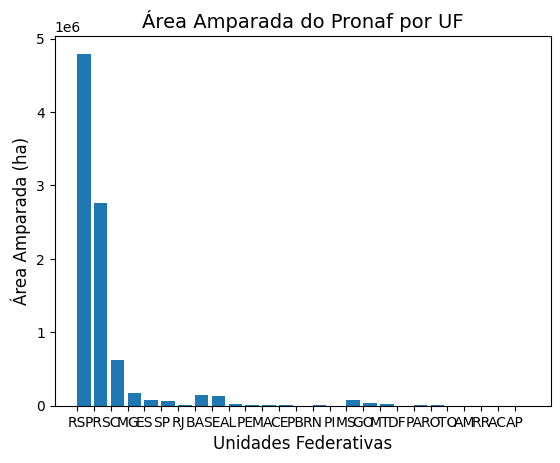

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# Gráficos para comparação entre os valores distribuidos por Unidades Federativas

# Utilizamos a tabela do PRONAF porém a mesma metodologia pode ser aplicada para o PRONAMP

plt.bar(dados_bcb_pronaf['SIGLA_UF'], dados_bcb_pronaf['ADESAO_AREA_AMPARADA_HA'], align='edge')
plt.xlabel('Unidades Federativas', fontsize=12)
plt.ylabel('Área Amparada (ha)', fontsize=12)
plt.title('Área Amparada do Pronaf por UF', fontsize=14)
plt.figure(figsize=(20, 10))
plt.tight_layout()

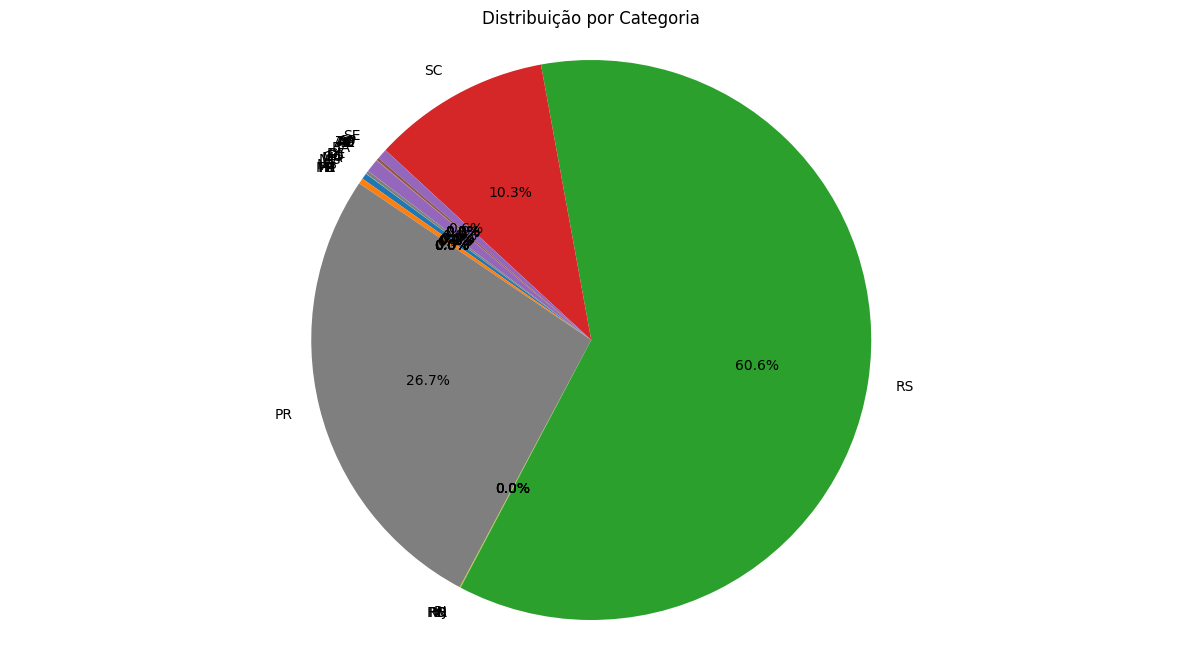

In [ ]:
# Criação do gráfico de pizza usando Matplotlib

# Utilizamos a tabela do PRONAF porém a mesma metodologia pode ser aplicada para o PRONAMP

grouped = dados_bcb_pronaf.groupby('SIGLA_UF')['COMUNICACAO_PERDA_QTD_CONTRATOS'].sum()
plt.figure(figsize=(15, 8))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição por Categoria')
plt.show()

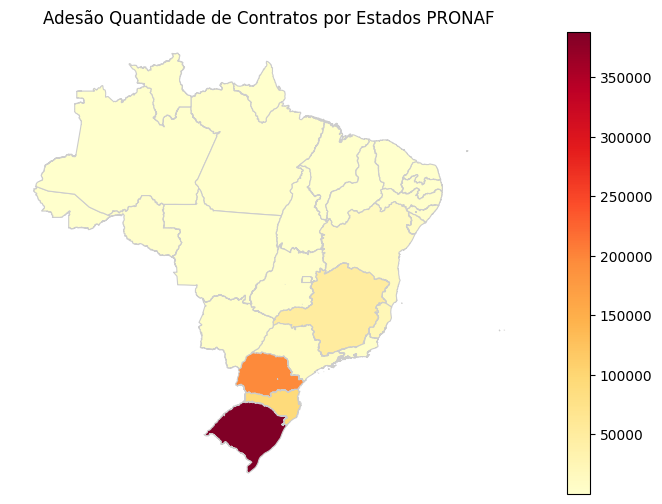

In [ ]:
# Carregar o shapefile dos estados do Brasil (Certifique-se de ter o arquivo "estados.shp" no diretório)
shapefile_path = "/content/BR_UF_2022.shp"
map_df = gpd.read_file(shapefile_path)

# Agrupar e calcular o investimento total por estado
df_grouped = dados_bcb_pronaf.groupby("SIGLA_UF")["ADESAO_QTDE_CONTRATOS"].sum().reset_index()

# Mesclar os dados do DataFrame com o shapefile
merged = map_df.set_index("SIGLA_UF").join(df_grouped.set_index("SIGLA_UF"))

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column="ADESAO_QTDE_CONTRATOS", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Adesão Quantidade de Contratos por Estados PRONAF")
ax.set_axis_off()
plt.show()

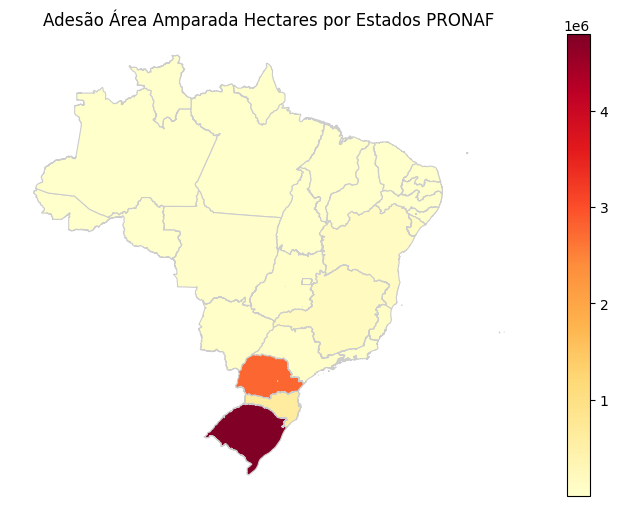

In [ ]:
# Carregar o shapefile dos estados do Brasil (Certifique-se de ter o arquivo "estados.shp" no diretório)
shapefile_path = "/content/BR_UF_2022.shp"
map_df = gpd.read_file(shapefile_path)

# Agrupar e calcular o investimento total por estado
df_grouped = dados_bcb_pronaf.groupby("SIGLA_UF")["ADESAO_AREA_AMPARADA_HA"].sum().reset_index()

# Mesclar os dados do DataFrame com o shapefile
merged = map_df.set_index("SIGLA_UF").join(df_grouped.set_index("SIGLA_UF"))

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column="ADESAO_AREA_AMPARADA_HA", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Adesão Área Amparada Hectares por Estados PRONAF")
ax.set_axis_off()
plt.show()

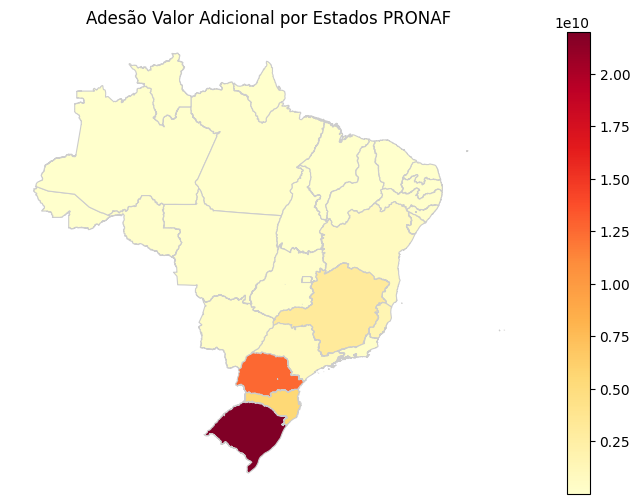

In [ ]:
# Carregar o shapefile dos estados do Brasil (Certifique-se de ter o arquivo "estados.shp" no diretório)
shapefile_path = "/content/BR_UF_2022.shp"
map_df = gpd.read_file(shapefile_path)

# Agrupar e calcular o investimento total por estado
df_grouped = dados_bcb_pronaf.groupby("SIGLA_UF")["ADESAO_VALOR_AMPARADO_R$"].sum().reset_index()

# Mesclar os dados do DataFrame com o shapefile
merged = map_df.set_index("SIGLA_UF").join(df_grouped.set_index("SIGLA_UF"))

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column="ADESAO_VALOR_AMPARADO_R$", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Adesão Valor Adicional por Estados PRONAF")
ax.set_axis_off()
plt.show()

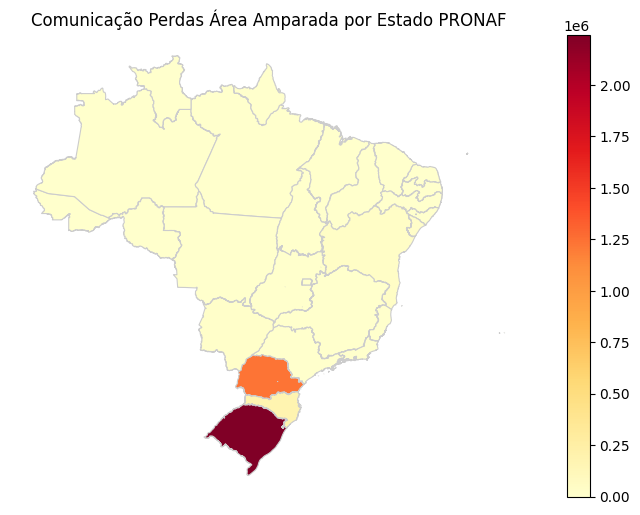

In [ ]:
# Carregar o shapefile dos estados do Brasil (Certifique-se de ter o arquivo "estados.shp" no diretório)
shapefile_path = "/content/BR_UF_2022.shp"
map_df = gpd.read_file(shapefile_path)

# Agrupar e calcular o investimento total por estado
df_grouped = dados_bcb_pronaf.groupby("SIGLA_UF")["COMUNICACAO_PERDA_AMPARADA_HA"].sum().reset_index()

# Mesclar os dados do DataFrame com o shapefile
merged = map_df.set_index("SIGLA_UF").join(df_grouped.set_index("SIGLA_UF"))

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column="COMUNICACAO_PERDA_AMPARADA_HA", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Comunicação Perdas Área Amparada por Estado PRONAF")
ax.set_axis_off()
plt.show()

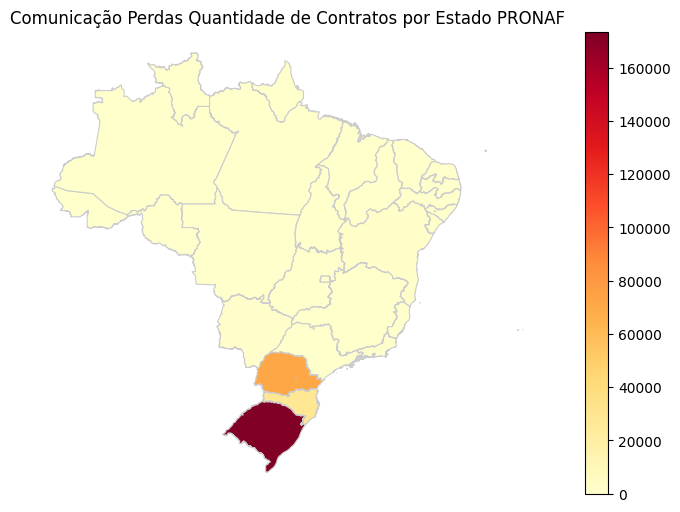

In [ ]:
# Carregar o shapefile dos estados do Brasil (Certifique-se de ter o arquivo "estados.shp" no diretório)
shapefile_path = "/content/BR_UF_2022.shp"
map_df = gpd.read_file(shapefile_path)

# Agrupar e calcular o investimento total por estado
df_grouped = dados_bcb_pronaf.groupby("SIGLA_UF")["COBERTURA_DEF_QTD_CONTRATOS"].sum().reset_index()

# Mesclar os dados do DataFrame com o shapefile
merged = map_df.set_index("SIGLA_UF").join(df_grouped.set_index("SIGLA_UF"))

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column="COBERTURA_DEF_QTD_CONTRATOS", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Comunicação Perdas Quantidade de Contratos por Estado PRONAF")
ax.set_axis_off()
plt.show()

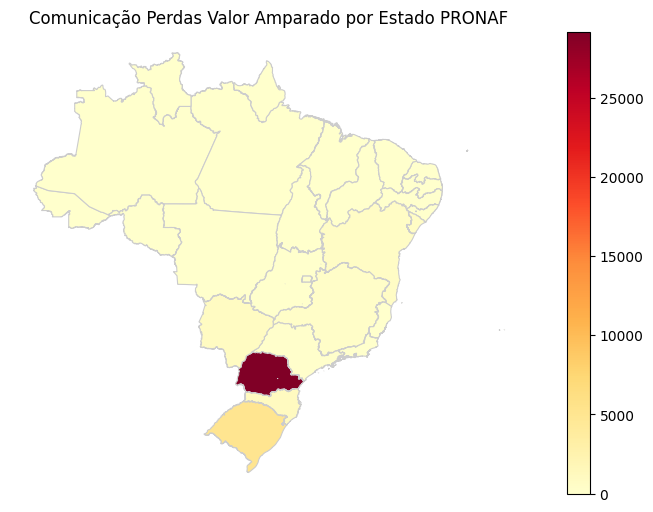

In [ ]:
# Carregar o shapefile dos estados do Brasil (Certifique-se de ter o arquivo "estados.shp" no diretório)
shapefile_path = "/content/BR_UF_2022.shp"
map_df = gpd.read_file(shapefile_path)

# Agrupar e calcular o investimento total por estado
df_grouped = dados_bcb_pronaf.groupby("SIGLA_UF")["COBERTURA_ANALISE_AREA_AMPARADA_HA"].sum().reset_index()

# Mesclar os dados do DataFrame com o shapefile
merged = map_df.set_index("SIGLA_UF").join(df_grouped.set_index("SIGLA_UF"))

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column="COBERTURA_ANALISE_AREA_AMPARADA_HA", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Comunicação Perdas Valor Amparado por Estado PRONAF")
ax.set_axis_off()
plt.show()

In [ ]:
dados_concatenados = pd.concat([dados_bcb_pronaf, dados_bcb_pronaf])
dados_concatenados

,SIGLA_UF,ADESAO_AREA_AMPARADA_HA,ADESAO_QTDE_CONTRATOS,ADESAO_VALOR_AMPARADO_R$,ADESAO_VALOR_ADICIONAL_R$,COMUNICACAO_PERDA_AMPARADA_HA,COMUNICACAO_PERDA_QTD_CONTRATOS,COMUNICACAO_PERDA_VALOR_AMPARADO_R$,COBERTURA_DEF_AREA_HA,COBERTURA_DEF_QTD_CONTRATOS,COBERTURA_DEF_VALOR_AMPARADO_R$,COBERTURA_VALOR_DEFERIDO_R$,COBERTURA_ANALISE_AREA_AMPARADA_HA,COBERTURDA_ANALISE_QTD_CONTRATOS,COBERTURA_ANALISE_VALOR_AMPARADO_R$
0,RS,4793804.4,388094,2.199707e+10,1.143757e+09,2244847.6,179150,1.169229e+10,2178374.1,173595,1.136837e+10,8.464698e+09,5033.6,622,3.488807e+07
1,PR,2767353.2,196541,1.256893e+10,7.239661e+08,1228149.6,78825,5.225561e+09,1108648.4,71830,4.771584e+09,3.395857e+09,29177.3,1660,1.444352e+08
2,SC,625706.1,90991,5.509491e+09,2.381566e+08,180473.6,30346,1.995320e+09,164125.4,28102,1.840595e+09,1.130955e+09,1064.5,176,1.294999e+07
3,MG,174300.9,50383,3.152658e+09,1.066265e+08,5391.8,1005,9.158965e+07,3656.6,674,6.276252e+07,3.516967e+07,359.0,101,8.776899e+06
4,ES,81649.6,22830,1.614514e+09,4.703692e+07,2457.4,528,5.920933e+07,1747.6,393,4.542161e+07,2.461332e+07,86.0,26,2.495057e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,SP,8.3,5,6.195467e+04,1.767710e+03,0.0,0,0.000000e+00,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000e+00
41,SC,28.5,2,1.236250e+05,7.338430e+03,0.0,0,0.000000e+00,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000e+00
42,PR,0.6,1,7.248000e+04,2.174750e+03,0.6,1,7.248000e+04,0.6,1,7.248000e+04,4.391762e+04,0.0,0,0.000000e+00
43,ES,2.0,1,7.732800e+04,3.094080e+03,0.0,0,0.000000e+00,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000e+00


In [ ]:
dados_programas = dados_concatenados.groupby('SIGLA_UF').sum().reset_index()
dados_programas

,SIGLA_UF,ADESAO_AREA_AMPARADA_HA,ADESAO_QTDE_CONTRATOS,ADESAO_VALOR_AMPARADO_R$,ADESAO_VALOR_ADICIONAL_R$,COMUNICACAO_PERDA_AMPARADA_HA,COMUNICACAO_PERDA_QTD_CONTRATOS,COMUNICACAO_PERDA_VALOR_AMPARADO_R$,COBERTURA_DEF_AREA_HA,COBERTURA_DEF_QTD_CONTRATOS,COBERTURA_DEF_VALOR_AMPARADO_R$,COBERTURA_VALOR_DEFERIDO_R$,COBERTURA_ANALISE_AREA_AMPARADA_HA,COBERTURDA_ANALISE_QTD_CONTRATOS,COBERTURA_ANALISE_VALOR_AMPARADO_R$
0,AC,712.2,242,6.573824e+06,2.012524e+05,0.0,0,0.000000e+00,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000e+00
1,AL,34121.0,4774,2.074634e+08,6.773155e+06,3331.4,136,1.669845e+07,2996.2,114,1.501831e+07,1.193413e+07,70.8,6,4.737628e+05
2,AM,983.8,314,1.153416e+07,3.709826e+05,0.0,0,0.000000e+00,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000e+00
3,AP,27.0,6,5.631762e+05,2.254160e+04,0.0,0,0.000000e+00,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000e+00
4,BA,294537.2,25064,1.533211e+09,5.451458e+07,84731.0,4554,3.441753e+08,81564.4,4420,3.300687e+08,2.517777e+08,1340.0,48,6.213539e+06
5,CE,14550.0,1744,8.031031e+07,2.356336e+06,306.6,46,1.133727e+06,154.8,16,6.359258e+05,3.831261e+05,4.2,2,2.041472e+05
6,DF,365.8,280,1.309837e+07,3.470671e+05,4.0,2,1.452914e+05,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000e+00
7,ES,163303.2,45662,3.229182e+09,9.408004e+07,4914.8,1056,1.184187e+08,3495.2,786,9.084322e+07,4.922665e+07,172.0,52,4.990114e+06
8,GO,76608.4,3454,3.368776e+08,1.519405e+07,2942.0,102,1.127979e+07,1736.8,64,6.514305e+06,3.221121e+06,60.0,2,3.676005e+05
9,MA,17902.4,1928,6.970017e+07,2.474757e+06,0.0,0,0.000000e+00,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000e+00


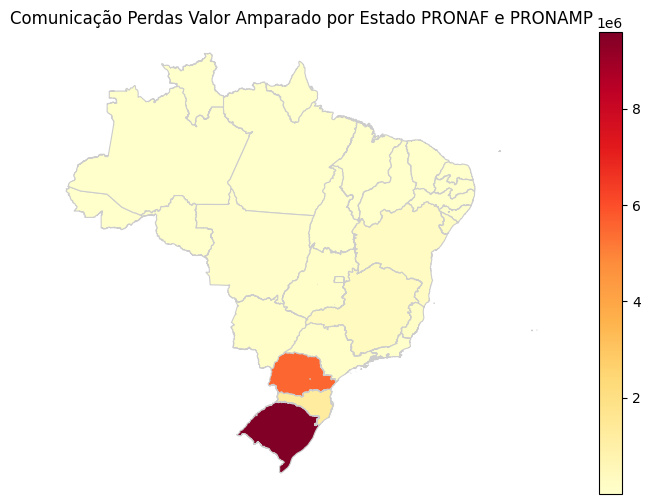

In [ ]:
# Carregar o shapefile dos estados do Brasil (Certifique-se de ter o arquivo "estados.shp" no diretório)
shapefile_path = "/content/BR_UF_2022.shp"
map_df = gpd.read_file(shapefile_path)

# Agrupar e calcular o investimento total por estado
df_grouped = dados_programas.groupby("SIGLA_UF")["ADESAO_AREA_AMPARADA_HA"].sum().reset_index()

# Mesclar os dados do DataFrame com o shapefile
merged = map_df.set_index("SIGLA_UF").join(df_grouped.set_index("SIGLA_UF"))

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column="ADESAO_AREA_AMPARADA_HA", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Comunicação Perdas Valor Amparado por Estado PRONAF e PRONAMP")
ax.set_axis_off()
plt.show()

In [ ]:
# RESUMO DATAFRAME 2

# Em resumo, separamos um dataset em dois dataframes para facilitar a manipulação do mesmo, estes dataframes mostram respectivamente os dois principais programas de crédito rural do governo PRONAF e PRONAMP
# Desta forma, por meio destes dados, pode-se entender a necessidade de crédito rural por unidade federativa e analisar quais estados possuem mais ou menos carência de crédito ou até mesmo
# compreender o nível e importância dos pequenos produtores rurais dentro de um contexto nacional

In [ ]:
dados_bcb_pronaf.dtypes


SIGLA_UF                                object
ADESAO_AREA_AMPARADA_HA                float64
ADESAO_QTDE_CONTRATOS                    int64
ADESAO_VALOR_AMPARADO_R$               float64
ADESAO_VALOR_ADICIONAL_R$              float64
COMUNICACAO_PERDA_AMPARADA_HA          float64
COMUNICACAO_PERDA_QTD_CONTRATOS          int64
COMUNICACAO_PERDA_VALOR_AMPARADO_R$    float64
COBERTURA_DEF_AREA_HA                  float64
COBERTURA_DEF_QTD_CONTRATOS              int64
COBERTURA_DEF_VALOR_AMPARADO_R$        float64
COBERTURA_VALOR_DEFERIDO_R$            float64
COBERTURA_ANALISE_AREA_AMPARADA_HA     float64
COBERTURDA_ANALISE_QTD_CONTRATOS         int64
COBERTURA_ANALISE_VALOR_AMPARADO_R$    float64
dtype: object

In [ ]:
dados_bcb_pronamp


,SIGLA_UF,ADESAO_AREA_AMPARADA_HA,ADESAO_QTDE_CONTRATOS,ADESAO_VALOR_AMPARADO_R$,ADESAO_VALOR_ADICIONAL_R$,COMUNICACAO_PERDA_AMPARADA_HA,COMUNICACAO_PERDA_QTD_CONTRATOS,COMUNICACAO_PERDA_VALOR_AMPARADO_R$,COBERTURA_DEF_AREA_HA,COBERTURA_DEF_QTD_CONTRATOS,COBERTURA_DEF_VALOR_AMPARADO_R$,COBERTURA_VALOR_DEFERIDO_R$,COBERTURA_ANALISE_AREA_AMPARADA_HA,COBERTURDA_ANALISE_QTD_CONTRATOS,COBERTURA_ANALISE_VALOR_AMPARADO_R$
0,RS,4793804.4,388094,2.199707e+10,1.143757e+09,2244847.6,179150,1.169229e+10,2178374.1,173595,1.136837e+10,8.464698e+09,5033.6,622,3.488807e+07
1,PR,2767353.2,196541,1.256893e+10,7.239661e+08,1228149.6,78825,5.225561e+09,1108648.4,71830,4.771584e+09,3.395857e+09,29177.3,1660,1.444352e+08
2,SC,625706.1,90991,5.509491e+09,2.381566e+08,180473.6,30346,1.995320e+09,164125.4,28102,1.840595e+09,1.130955e+09,1064.5,176,1.294999e+07
3,MG,174300.9,50383,3.152658e+09,1.066265e+08,5391.8,1005,9.158965e+07,3656.6,674,6.276252e+07,3.516967e+07,359.0,101,8.776899e+06
4,ES,81649.6,22830,1.614514e+09,4.703692e+07,2457.4,528,5.920933e+07,1747.6,393,4.542161e+07,2.461332e+07,86.0,26,2.495057e+06
5,SP,70383.0,10255,7.046205e+08,2.459924e+07,4559.1,436,3.080052e+07,3282.2,309,2.105556e+07,1.055034e+07,119.9,12,1.135044e+06
6,RJ,7065.1,3843,2.092608e+08,5.613187e+06,189.2,147,9.734937e+06,138.6,106,6.993736e+06,3.671847e+06,24.8,20,1.492645e+06
7,BA,147268.6,12532,7.666053e+08,2.725729e+07,42365.5,2277,1.720876e+08,40782.2,2210,1.650343e+08,1.258888e+08,670.0,24,3.106770e+06
8,SE,126938.2,7677,5.180229e+08,1.938456e+07,30504.6,1768,1.397490e+08,28985.3,1697,1.325096e+08,9.624988e+07,783.4,31,4.098071e+06
9,AL,17060.2,2386,1.037208e+08,3.386251e+06,1665.7,68,8.349226e+06,1498.1,57,7.509157e+06,5.967067e+06,35.4,3,2.368814e+05


## Dataframes - IBGE dados de atibaia

- Adubação

In [ ]:
dados_adubacao = pd.read_csv('Adubacao.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_adubacao

,adubacao_quimica,adubacao_organica,adubacao_quimica_organica,adubacao_nao_realizada
0,136,77,308,78


In [ ]:
# converter dados para int
dados_adubacao['adubacao_quimica'] = dados_adubacao['adubacao_quimica'].astype(int)
dados_adubacao['adubacao_organica'] = dados_adubacao['adubacao_organica'].astype(int)
dados_adubacao['adubacao_quimica_organica'] = dados_adubacao['adubacao_quimica_organica'].astype(int)
dados_adubacao['adubacao_nao_realizada'] = dados_adubacao['adubacao_nao_realizada'].astype(int)
dados_adubacao

,adubacao_quimica,adubacao_organica,adubacao_quimica_organica,adubacao_nao_realizada
0,136,77,308,78


In [ ]:
# adicionar a coluna com a unidade de medida dos dados
dados_adubacao['unidade'] = 'estabelecimentos'
dados_adubacao_final = dados_adubacao
dados_adubacao_final

,adubacao_quimica,adubacao_organica,adubacao_quimica_organica,adubacao_nao_realizada,unidade
0,136,77,308,78,estabelecimentos


In [ ]:
dados_adubacao_final.dtypes

adubacao_quimica              int64
adubacao_organica             int64
adubacao_quimica_organica     int64
adubacao_nao_realizada        int64
unidade                      object
dtype: object

In [ ]:
from google.colab import files
dados_adubacao_final.to_csv('dados_adubacao_final.csv')
files.download('dados_adubacao_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Agrotóxicos

In [ ]:
dados_agrotoxico = pd.read_csv('Agrotoxico.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_agrotoxico

,Utilizou,Não utilizou
0,436,163


In [ ]:
dados_agrotoxico_final = dados_agrotoxico.rename(columns = {'Utilizou':'utilizado','Não utilizou':'nao_utilizado'})
dados_agrotoxico_final

,utilizado,nao_utilizado
0,436,163


In [ ]:
# converter dados para int
dados_agrotoxico_final['utilizado'] = dados_agrotoxico_final['utilizado'].astype(int)
dados_agrotoxico_final['nao_utilizado'] = dados_agrotoxico_final['nao_utilizado'].astype(int)
dados_agrotoxico_final

,utilizado,nao_utilizado
0,436,163


In [ ]:
# adicionar a coluna com a unidade de medida dos dados
dados_agrotoxico_final['unidade'] = 'estabelecimentos'
dados_agrotoxico_final

,utilizado,nao_utilizado,unidade
0,436,163,estabelecimentos


In [ ]:
dados_agrotoxico_final.dtypes

utilizado         int64
nao_utilizado     int64
unidade          object
dtype: object

In [ ]:
from google.colab import files
dados_agrotoxico_final.to_csv('dados_agrotoxico_final.csv')
files.download('dados_agrotoxico_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Área

In [ ]:
dados_area = pd.read_csv('Area.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_area

,Área dos estabelecimentos agropecuários
0,12043 hectares


In [ ]:
# renomear coluna
dados_area_final = dados_area.rename(columns = {'Área dos estabelecimentos agropecuários':'area_estabelecimentos'})
dados_area_final

,area_estabelecimentos
0,12043 hectares


In [ ]:
# deixar somente o valor numérico na coluna para análise
dados_area_final['area_estabelecimentos'] = dados_area_final['area_estabelecimentos'].str.replace('12043 hectares', '12043')
dados_area_final

,area_estabelecimentos
0,12043


In [ ]:
# converter dados para int
dados_area_final['area_estabelecimentos'] = dados_area_final['area_estabelecimentos'].astype(int)
dados_area_final

,area_estabelecimentos
0,12043


In [ ]:
# adicionar a coluna com a unidade de medida dos dados
dados_area_final['unidade'] = 'hectares'
dados_area_final

,area_estabelecimentos,unidade
0,12043,hectares


In [ ]:
dados_area_final.dtypes

area_estabelecimentos     int64
unidade                  object
dtype: object

In [ ]:
from google.colab import files
dados_area_final.to_csv('dados_area_final.csv')
files.download('dados_area_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Classe Idade Produtor

In [ ]:
dados_classe_idade = pd.read_csv('Classe Idade Produtores.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_classe_idade

,Menos de 25 anos,25 a menos de 35 anos,35 a menos de 45 anos,45 a menos de 55 anos,55 a menos de 65 anos,65 a menos de 75 anos,75 anos e mais
0,12,33,119,134,107,78,32


In [ ]:
# renomear colunas
dados_classe_idade_final = dados_classe_idade.rename(columns = {'Menos de 25 anos':'menor_25_anos', '25 a menos de 35 anos':'maior_25_menor_35','35 a menos de 45 anos':'maior_35_menor_45','45 a menos de 55 anos':'maior_45_menor_55','55 a menos de 65 anos':'maior_55_menor_65','65 a menos de 75 anos':'maior_65_menor_75','75 anos e mais':'maior_75_anos'})
dados_classe_idade_final

,menor_25_anos,maior_25_menor_35,maior_35_menor_45,maior_45_menor_55,maior_55_menor_65,maior_65_menor_75,maior_75_anos
0,12,33,119,134,107,78,32


In [ ]:
# converter dados para int
dados_classe_idade_final['menor_25_anos'] = dados_classe_idade_final['menor_25_anos'].astype(int)
dados_classe_idade_final['maior_25_menor_35'] = dados_classe_idade_final['maior_25_menor_35'].astype(int)
dados_classe_idade_final['maior_35_menor_45'] = dados_classe_idade_final['maior_35_menor_45'].astype(int)
dados_classe_idade_final['maior_45_menor_55'] = dados_classe_idade_final['maior_45_menor_55'].astype(int)
dados_classe_idade_final['maior_55_menor_65'] = dados_classe_idade_final['maior_55_menor_65'].astype(int)
dados_classe_idade_final['maior_65_menor_75'] = dados_classe_idade_final['maior_65_menor_75'].astype(int)
dados_classe_idade_final['maior_75_anos'] = dados_classe_idade_final['maior_75_anos'].astype(int)
dados_classe_idade_final

,menor_25_anos,maior_25_menor_35,maior_35_menor_45,maior_45_menor_55,maior_55_menor_65,maior_65_menor_75,maior_75_anos
0,12,33,119,134,107,78,32


In [ ]:
# adicionar a coluna com a unidade de medida dos dados
dados_classe_idade_final['unidade'] = 'estabelecimentos'
dados_classe_idade_final

,menor_25_anos,maior_25_menor_35,maior_35_menor_45,maior_45_menor_55,maior_55_menor_65,maior_65_menor_75,maior_75_anos,unidade
0,12,33,119,134,107,78,32,estabelecimentos


In [ ]:
dados_classe_idade_final.dtypes

menor_25_anos         int64
maior_25_menor_35     int64
maior_35_menor_45     int64
maior_45_menor_55     int64
maior_55_menor_65     int64
maior_65_menor_75     int64
maior_75_anos         int64
unidade              object
dtype: object

In [ ]:
from google.colab import files
dados_classe_idade_final.to_csv('dados_classe_idade_final.csv')
files.download('dados_classe_idade_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Condição Legal

In [ ]:
dados_condicao_legal = pd.read_csv('Condicao Legal.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_condicao_legal

,união,Produtor individual
0,1333 hectares,10608 hectares


In [ ]:
# renomear colunas
dados_condicao_legal_final = dados_condicao_legal.rename(columns = {'união':'cdm_consorcio_uniao','Produtor individual':'individual'})
dados_condicao_legal_final

,cdm_consorcio_uniao,individual
0,1333 hectares,10608 hectares


In [ ]:
# deixar somente o valor numérico na coluna para análise
dados_condicao_legal_final['cdm_consorcio_uniao'] = dados_condicao_legal_final['cdm_consorcio_uniao'].str.replace('1333 hectares', '1333')
dados_condicao_legal_final['individual'] = dados_condicao_legal_final['individual'].str.replace('10608 hectares', '10608')
dados_condicao_legal_final

,cdm_consorcio_uniao,individual
0,1333,10608


In [ ]:
# converter dados para int
dados_condicao_legal_final['cdm_consorcio_uniao'] = dados_condicao_legal_final['cdm_consorcio_uniao'].astype(int)
dados_condicao_legal_final['individual'] = dados_condicao_legal_final['individual'].astype(int)
dados_condicao_legal_final

,cdm_consorcio_uniao,individual
0,1333,10608


In [ ]:
# adicionar a coluna com a unidade de medida dos dados
dados_condicao_legal_final['unidade'] = 'hectares'
dados_condicao_legal_final

,cdm_consorcio_uniao,individual,unidade
0,1333,10608,hectares


In [ ]:
dados_condicao_legal_final.dtypes

cdm_consorcio_uniao     int64
individual              int64
unidade                object
dtype: object

In [ ]:
from google.colab import files
dados_condicao_legal_final.to_csv('dados_condicao_legal_final.csv')
files.download('dados_condicao_legal_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Condicao Produtor Terra

In [ ]:
dados_condicao_produtor_terra = pd.read_csv('Condicao Produtor Terra.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_condicao_produtor_terra

,PROPRIETÁRIO(A) INCLUSIVE OS(AS) COPROPRIETÁRIOS(AS) DE TERRAS TITULADAS COLETIVAMENTE,Arrendatário(a)
0,9625 hectares,1619 hectares


In [ ]:
# renomear colunas
dados_condicao_produtor_terra_final = dados_condicao_produtor_terra.rename(columns = {'PROPRIETÁRIO(A) INCLUSIVE OS(AS) COPROPRIETÁRIOS(AS) DE TERRAS TITULADAS COLETIVAMENTE':'proprietarios',
                                                                                      'Arrendatário(a)':'arrendatario'})
dados_condicao_produtor_terra_final

,proprietarios,arrendatario
0,9625 hectares,1619 hectares


In [ ]:
# deixar somente o valor numérico na coluna para análise
dados_condicao_produtor_terra_final['proprietarios'] = dados_condicao_produtor_terra_final['proprietarios'].str.replace('9625 hectares', '9625')
dados_condicao_produtor_terra_final['arrendatario'] = dados_condicao_produtor_terra_final['arrendatario'].str.replace('1619 hectares', '1619')
dados_condicao_produtor_terra_final

,proprietarios,arrendatario
0,9625,1619


In [ ]:
# converter dados para int
dados_condicao_produtor_terra_final['proprietarios'] = dados_condicao_produtor_terra_final['proprietarios'].astype(int)
dados_condicao_produtor_terra_final['arrendatario'] = dados_condicao_produtor_terra_final['arrendatario'].astype(int)
dados_condicao_produtor_terra_final

,proprietarios,arrendatario
0,9625,1619


In [ ]:
# adicionar a coluna com a unidade de medida dos dados
dados_condicao_produtor_terra_final['unidade'] = 'hectares'
dados_condicao_produtor_terra_final

,proprietarios,arrendatario,unidade
0,9625,1619,hectares


In [ ]:
dados_condicao_produtor_terra_final.dtypes

proprietarios     int64
arrendatario      int64
unidade          object
dtype: object

In [ ]:
from google.colab import files
dados_condicao_produtor_terra_final.to_csv('dados_condicao_produtor_terra_final.csv')
files.download('dados_condicao_produtor_terra_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Financiamento

In [ ]:
dados_financiamento = pd.read_csv('Financiamento.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_financiamento

,Obteve,Investimento,Custeio,Manutenção,Programas governamentais de crÃ©dito,Pronaf,Pronamp,"Outro programa (federal, estadual ou municipal)",Outras fontes,Não obteve
0,81,24,54,18,27,15,5,11,54,519


In [ ]:
# renomear colunas
dados_financiamento_final = dados_financiamento.rename(columns = {'Obteve':'obteve', 'Investimento':'investimento', 'Custeio':'custeio', 'Manutenção':'manutencao',
                                                                  'Programas governamentais de crÃ©dito': 'programas_gov_de_credito', 'Pronaf': 'pronaf',
                                                                  'Pronamp' : 'pronamp' , 'Outro programa (federal, estadual ou municipal)' : 'outro_programa',
                                                                  'Outras fontes':'outras_fontes', 'Não obteve' : 'nao_obteve' })
dados_financiamento_final

,obteve,investimento,custeio,manutencao,programas_gov_de_credito,pronaf,pronamp,outro_programa,outras_fontes,nao_obteve
0,81,24,54,18,27,15,5,11,54,519


In [ ]:
# adicionar a coluna com a unidade de medida dos dados
dados_financiamento_final['unidade'] = 'estabelecimento'
dados_financiamento_final

,obteve,investimento,custeio,manutencao,programas_gov_de_credito,pronaf,pronamp,outro_programa,outras_fontes,nao_obteve,unidade
0,81,24,54,18,27,15,5,11,54,519,estabelecimento


In [ ]:
dados_financiamento_final.dtypes

obteve                       int64
investimento                 int64
custeio                      int64
manutencao                   int64
programas_gov_de_credito     int64
pronaf                       int64
pronamp                      int64
outro_programa               int64
outras_fontes                int64
nao_obteve                   int64
unidade                     object
dtype: object

In [ ]:
from google.colab import files
dados_financiamento_final.to_csv('dados_financiamento_final.csv')
files.download('dados_financiamento_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Laranja

In [ ]:
dados_laranja = pd.read_csv('Laranja.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_laranja

,Nro de estabelecimentos com 50 pés ou mais,Quantidade produzida,Qtde de pés,Área dos estabelecimentos,Área colhida,Valor da produção
0,7,185,6,22,21,"R$ 112.200,00"


In [ ]:
# renomear colunas
dados_laranja_final = dados_laranja.rename(columns = {'Nro de estabelecimentos com 50 pés ou mais':'nro_estabelecimentos','Quantidade produzida': 'quantidade_produzida(t)',
                                                      'Qtde de pés' : 'qt_de_pes(unidades)', 'Área dos estabelecimentos' : 'area_estabelecimentos(ha)',
                                                      'Área colhida' : 'area_colhida(ha)', 'Valor da produção' : 'valor_producao(R$)'})
dados_laranja_final

,nro_estabelecimentos,quantidade_produzida(t),qt_de_pes(unidades),area_estabelecimentos(ha),area_colhida(ha),valor_producao(R$)
0,7,185,6,22,21,"R$ 112.200,00"


In [ ]:
# transformar dados para valor correto
dados_laranja_final['valor_producao(R$)'] = dados_laranja_final['valor_producao(R$)'].str.replace('R$ 112.200,00', '112.200.000', regex=False)
dados_laranja_final.loc[0, 'qt_de_pes(unidades)'] = 6000

In [ ]:
# transformar dados para valor correto
dados_laranja_final.loc[0, 'valor_producao(R$)'] = 112200000
dados_laranja_final

,nro_estabelecimentos,quantidade_produzida(t),qt_de_pes(unidades),area_estabelecimentos(ha),area_colhida(ha),valor_producao(R$)
0,7,185,6000,22,21,112200000


In [ ]:
# converter dados para float
dados_laranja_final['quantidade_produzida(t)'] = dados_laranja_final['quantidade_produzida(t)'].astype(float)
dados_laranja_final['valor_producao(R$)'] = dados_laranja_final['valor_producao(R$)'].astype(float)
dados_laranja_final

,nro_estabelecimentos,quantidade_produzida(t),qt_de_pes(unidades),area_estabelecimentos(ha),area_colhida(ha),valor_producao(R$)
0,7,185.0,6000,22,21,112200000.0


In [ ]:
dados_laranja_final.dtypes

nro_estabelecimentos           int64
quantidade_produzida(t)      float64
qt_de_pes(unidades)            int64
area_estabelecimentos(ha)      int64
area_colhida(ha)               int64
valor_producao(R$)           float64
dtype: object

In [ ]:
from google.colab import files
dados_laranja_final.to_csv('dados_laranja_final.csv')
files.download('dados_laranja_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Pêssego

In [ ]:
dados_pessego = pd.read_csv('Pessego.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_pessego

,Nro de estabelecimentos com 50 pés ou mais,Quantidade produzida,Qtde de pés,Área dos estabelecimentos,Área colhida,Valor da produção
0,21,1080,53,100,84,"R$ 2.621.780,00"


In [ ]:
# renomear colunas
dados_pessego_final = dados_pessego.rename(columns = {'Nro de estabelecimentos com 50 pés ou mais':'nro_estabelecimentos','Quantidade produzida': 'quantidade_produzida(t)',
                                                      'Qtde de pés' : 'qt_de_pes(unidades)', 'Área dos estabelecimentos' : 'area_estabelecimentos(ha)',
                                                      'Área colhida' : 'area_colhida(ha)', 'Valor da produção' : 'valor_producao(R$)' })
dados_pessego_final

,nro_estabelecimentos,quantidade_produzida(t),qt_de_pes(unidades),area_estabelecimentos(ha),area_colhida(ha),valor_producao(R$)
0,21,1080,53,100,84,"R$ 2.621.780,00"


In [ ]:
# transformar dados para valor correto
dados_pessego_final.loc[0, 'qt_de_pes(unidades)'] = 53000
dados_pessego_final

,nro_estabelecimentos,quantidade_produzida(t),qt_de_pes(unidades),area_estabelecimentos(ha),area_colhida(ha),valor_producao(R$)
0,21,1080,53000,100,84,"R$ 2.621.780,00"


In [ ]:
dados_pessego_final['valor_producao(R$)'] = dados_pessego_final['valor_producao(R$)'].str.replace('R$ 2.621.780,00', '2.621.780.000', regex=False)
dados_pessego_final

,nro_estabelecimentos,quantidade_produzida(t),qt_de_pes(unidades),area_estabelecimentos(ha),area_colhida(ha),valor_producao(R$)
0,21,1080,53000,100,84,2.621.780.000


In [ ]:
dados_pessego_final.loc[0, 'valor_producao(R$)'] = 2621780000
dados_pessego_final

,nro_estabelecimentos,quantidade_produzida(t),qt_de_pes(unidades),area_estabelecimentos(ha),area_colhida(ha),valor_producao(R$)
0,21,1080,53000,100,84,2621780000


In [ ]:
# converter dados para float
dados_pessego_final['valor_producao(R$)'] = dados_pessego_final['valor_producao(R$)'].astype(float)
dados_pessego_final['quantidade_produzida(t)'] = dados_pessego_final['quantidade_produzida(t)'].astype(float)
dados_pessego_final

,nro_estabelecimentos,quantidade_produzida(t),qt_de_pes(unidades),area_estabelecimentos(ha),area_colhida(ha),valor_producao(R$)
0,21,1080.0,53000,100,84,2.621780e+09


In [ ]:
dados_pessego_final.dtypes

nro_estabelecimentos           int64
quantidade_produzida(t)      float64
qt_de_pes(unidades)            int64
area_estabelecimentos(ha)      int64
area_colhida(ha)               int64
valor_producao(R$)           float64
dtype: object

In [ ]:
from google.colab import files
dados_pessego_final.to_csv('dados_pessego_final.csv')
files.download('dados_pessego_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Matas Florestas

In [ ]:
dados_matas = pd.read_csv('Matas Florestas.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_matas

,Naturais,Naturais destinadas á preservação permanente ou reserva legal,Florestas plantadas
0,196 há,2216 ha,410 ha


In [ ]:
# renomear colunas
dados_matas_final = dados_matas.rename(columns={'Naturais': 'naturais',
                                                'Naturais destinadas á  preservação permanente ou reserva legal': 'naturais_preservacao_reserva',
                                                'Florestas plantadas': 'florestas_plantadas'})
dados_matas_final

,naturais,Naturais destinadas á preservação permanente ou reserva legal,florestas_plantadas
0,196 há,2216 ha,410 ha


In [ ]:
# renomear colunas
dados_matas_final.columns = ['naturais',
       'naturais_preservação_ou_reserva',
       'florestas_plantadas']
dados_matas_final

,naturais,naturais_preservação_ou_reserva,florestas_plantadas
0,196 há,2216 ha,410 ha


In [ ]:
# transformar os dados para numéricos apenas
dados_matas_final['naturais'] = dados_matas_final['naturais'].str.replace('196 há', '196')
dados_matas_final['naturais_preservação_ou_reserva'] = dados_matas_final['naturais_preservação_ou_reserva'].str.replace('2216 ha', '2216')
dados_matas_final['florestas_plantadas'] = dados_matas_final['florestas_plantadas'].str.replace('410 ha', '410')
dados_matas_final

,naturais,naturais_preservação_ou_reserva,florestas_plantadas
0,196,2216,410


In [ ]:
# adicionar a coluna com a unidade de medida dos dados
dados_matas_final['unidade'] = 'hectares'
dados_matas_final

,naturais,naturais_preservação_ou_reserva,florestas_plantadas,unidade
0,196,2216,410,hectares


In [ ]:
# converter dados para int
dados_matas_final['naturais'] = dados_matas_final['naturais'].astype(int)
dados_matas_final['naturais_preservação_ou_reserva'] = dados_matas_final['naturais_preservação_ou_reserva'].astype(int)
dados_matas_final['florestas_plantadas'] = dados_matas_final['florestas_plantadas'].astype(int)
dados_matas_final

,naturais,naturais_preservação_ou_reserva,florestas_plantadas,unidade
0,196,2216,410,hectares


In [ ]:
from google.colab import files
dados_matas_final.to_csv('dados_matas_final.csv')
files.download('dados_matas_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sexo

In [ ]:
dados_sexo = pd.read_csv('Sexo.csv', sep = ';', decimal = ',', encoding = 'UTF-8')
dados_sexo

,Masculino,Feminino
0,515,82


In [ ]:
dados_sexo.dtypes

Masculino    int64
Feminino     int64
dtype: object

In [ ]:
from google.colab import files
dados_sexo.to_csv('dados_sexo.csv')
files.download('dados_sexo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>